# **[1] Summoning Important Libraries**

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from google.colab import files
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set2')
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

# **[2] Data Upload**

In [ ]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
df = pd.read_csv('dataset.csv')

# **[3] Data Overview**

In [ ]:
print(f'Number Of Rows & Columns: {df.shape}\n')
print('-' * 30)
print(f'\nFirst 5 Rows: \n{df.head()}\n')
print('-' * 30)
print(f'\nLast 5 Rows: \n{df.tail()}')

Number Of Rows & Columns: (1000, 9)

------------------------------

First 5 Rows: 
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  11/24/2023     CUST001    Male   34           Beauty   
1               2   2/27/2023     CUST002  Female   26         Clothing   
2               3   1/13/2023     CUST003    Male   50      Electronics   
3               4   5/21/2023     CUST004    Male   37         Clothing   
4               5    5/6/2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

------------------------------

Last 5 Rows: 
     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996   5/16/2023     CUST996    Male   62         Clothing   


In [ ]:
print(f'Data Types: \n{df.dtypes}')

Data Types: 
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [ ]:
print(f'Missing Values As A Number: \n{df.isnull().sum()}\n')
print('-' * 50)
print(f'\nMissing Values As A Percentage: \n{df.isnull().mean() * 100}')

Missing Values As A Number: 
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

--------------------------------------------------

Missing Values As A Percentage: 
Transaction ID      0.0
Date                0.0
Customer ID         0.0
Gender              0.0
Age                 0.0
Product Category    0.0
Quantity            0.0
Price per Unit      0.0
Total Amount        0.0
dtype: float64


In [ ]:
print (f'Duplicated Rows: \n{df.duplicated().sum()}')

Duplicated Rows: 
0


In [ ]:
print(f'Unique Values: \n{df.nunique()}')

Unique Values: 
Transaction ID      1000
Date                 344
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64


In [ ]:
print(f'Descriptive Statistics For Numeric Data: \n{round(df.describe(), 2)}\n')
print('-' * 50)
print(f'\nDescriptive Statistics For Object Data: \n{df.describe(include="object")}')

Descriptive Statistics For Numeric Data: 
       Transaction ID      Age  Quantity  Price per Unit  Total Amount
count         1000.00  1000.00   1000.00         1000.00        1000.0
mean           500.50    41.39      2.51          179.89         456.0
std            288.82    13.68      1.13          189.68         560.0
min              1.00    18.00      1.00           25.00          25.0
25%            250.75    29.00      1.00           30.00          60.0
50%            500.50    42.00      3.00           50.00         135.0
75%            750.25    53.00      4.00          300.00         900.0
max           1000.00    64.00      4.00          500.00        2000.0

--------------------------------------------------

Descriptive Statistics For Object Data: 
             Date Customer ID  Gender Product Category
count        1000        1000    1000             1000
unique        344        1000       2                3
top     5/16/2023    CUST1000  Female         Clothing
freq 

Min Age: 18 .... Max Age: 64
--------------------------------------------------


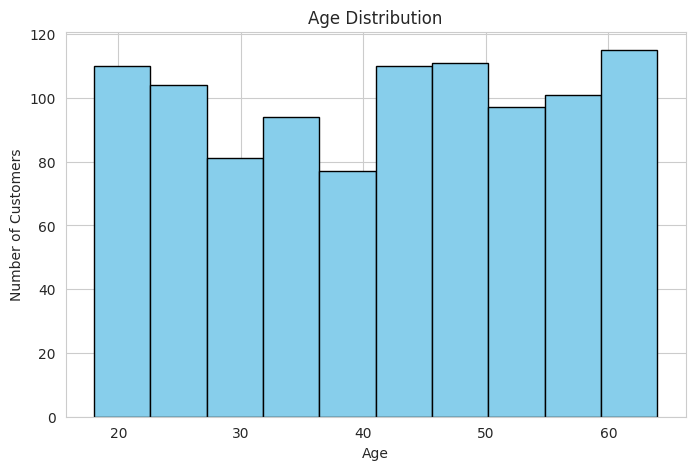

In [ ]:
print(f'Min Age: {df["Age"].min()} .... Max Age: {df["Age"].max()}')
print('-' * 50)
plt.figure(figsize=(8, 5))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(False)
df['Age'].hist(bins=10, color='skyblue', edgecolor='black')
plt.show()

In [ ]:
print(f'Min Price Is: {df["Price per Unit"].min()} .... Max Price Is: {df["Price per Unit"].max()}')

Min Price Is: 25 .... Max Price Is: 500


In [ ]:
df["Gender"].value_counts()

,count
Gender,
Female,510
Male,490


In [ ]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


# **[4] Data Cleaning**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Day Of Week'] = df['Date'].dt.day_name()

In [ ]:
df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']] = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0
Year,0


# **[5] Data Analysis**

#### **(1) Sales Analysis By Time Period**

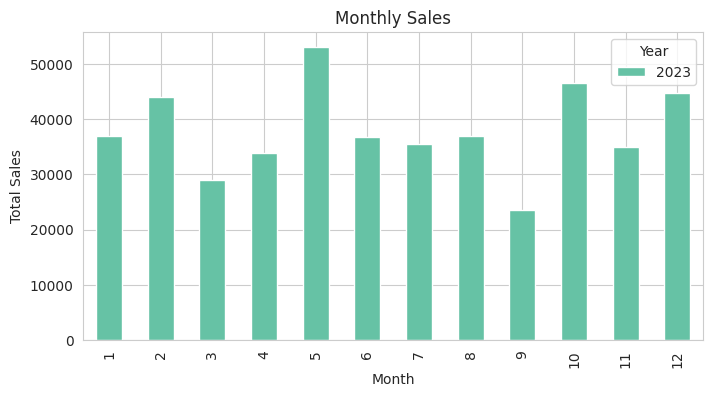

In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='Total Amount')
monthly_sales_pivot.plot(kind='bar', figsize=(8, 4), title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

#### **(2) Value Of Products Sold**

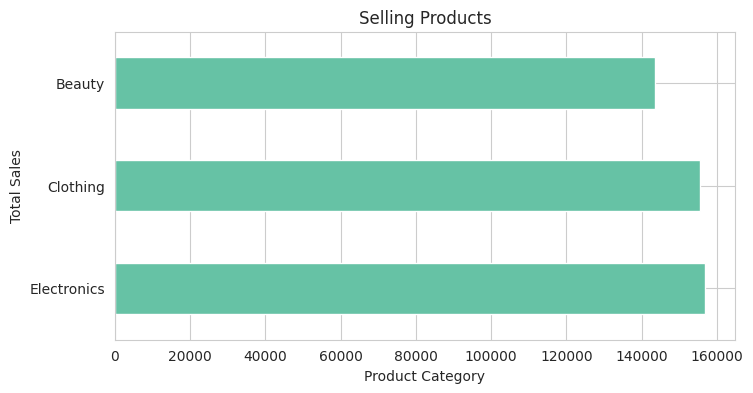

In [ ]:
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
top_products.plot(kind='barh', figsize=(8, 4), title='Selling Products')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

#### **(3) Quantity Of Products Sold**

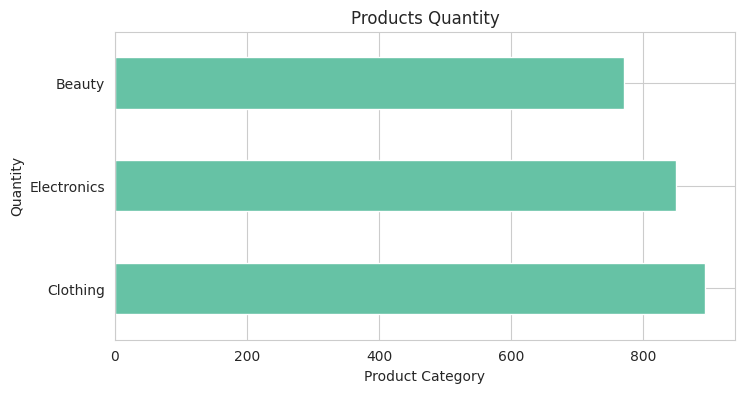

In [ ]:
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
top_products.plot(kind='barh', figsize=(8, 4), title='Products Quantity')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.show()

#### **(4) Sales By Gender**

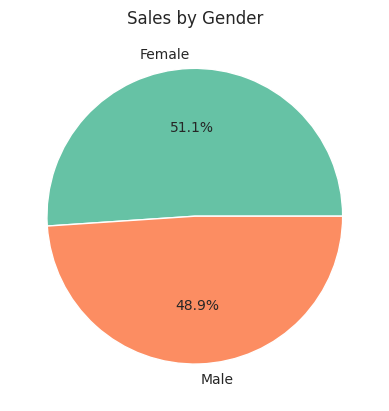

In [ ]:
df.groupby('Gender')['Total Amount'].sum().plot(kind='pie', autopct='%1.1f%%', title='Sales by Gender')
plt.ylabel('')
plt.show()

#### **(5) Analysis By Days**

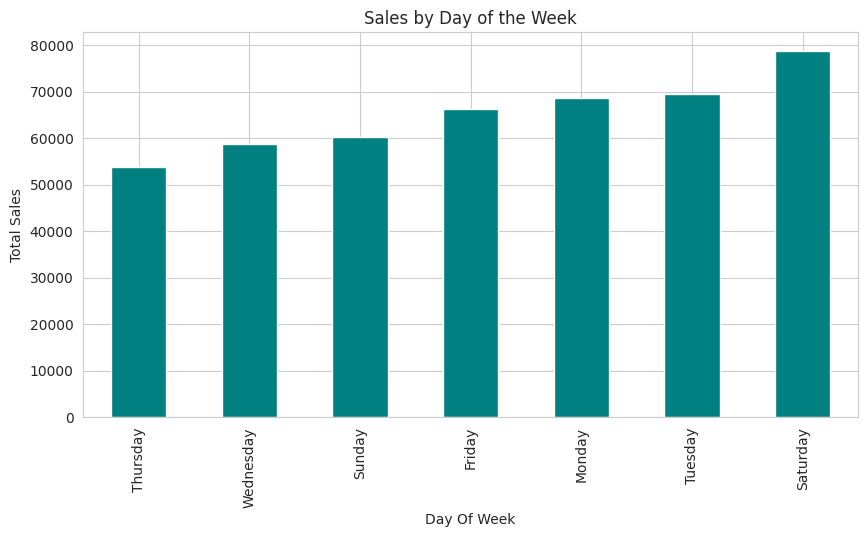

In [ ]:
sales_by_day = df.groupby('Day Of Week')['Total Amount'].sum().sort_values()
sales_by_day.plot(kind='bar', title='Sales by Day of the Week', figsize=(10,5), color='teal')
plt.ylabel('Total Sales')
plt.show()

# **[6] Save Data In An Excel File**

In [ ]:
df = df[['Date', 'Year', 'Month', 'Day Of Week', 'Customer ID', 'Gender', 'Product Category', 'Quantity', 'Total Amount']]

In [ ]:
print(df.dtypes)

Date                datetime64[ns]
Year                         int32
Month                        int32
Day Of Week                 object
Customer ID                 object
Gender                      object
Product Category            object
Quantity                     int64
Total Amount                 int64
dtype: object


In [ ]:
# حفظ الملف مع كل الأعمدة الجديدة
df.to_excel('cleaned_data.xlsx', index=False)

In [ ]:
files.download('cleaned_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>